# Naive Bayes

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [40]:
filename = "cleaned_dataset.csv"

df = pd.read_csv(filename)

print(df)
print(df.dtypes)

      is_clean                                       product_name  \
0            1                        Hydrating Lip Treatment Oil   
1            1                  Skin-Enhancing Tinted Moisturizer   
2            1   Lash-Amplifying Volumizing & Lengthening Mascara   
3            1           Skin Melt Talc-Free Loose Setting Powder   
4            1                    Light-Catching Highlighter Balm   
...        ...                                                ...   
1189         0                  Lash Clash Extreme Volume Mascara   
1190         0                     The Bold High Pigment Lipstick   
1191         0     NU LIP & CHEEK BALMY TINT with Hyaluronic Acid   
1192         0  NU GLOW IN BALM Face Priming Moisturizer with ...   
1193         0  NU BLOTTING LOTION Pore Minimizer & Mattifying...   

              brand_name  size  loves_count  number_of_reviews  rating  \
0               Ami Colé  0.15        22871                397  4.3401   
1               Ami Col

Sample of training data (X_train):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sample of testing data (X_test):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       194
           1       0.59      0.89      0.71        45

    accuracy                           0.86       239
   macro avg       0.78      0.87      0.81       239
weighted avg       0.90      0.86      0.87       239

[[166  28]
 [  5  40]]


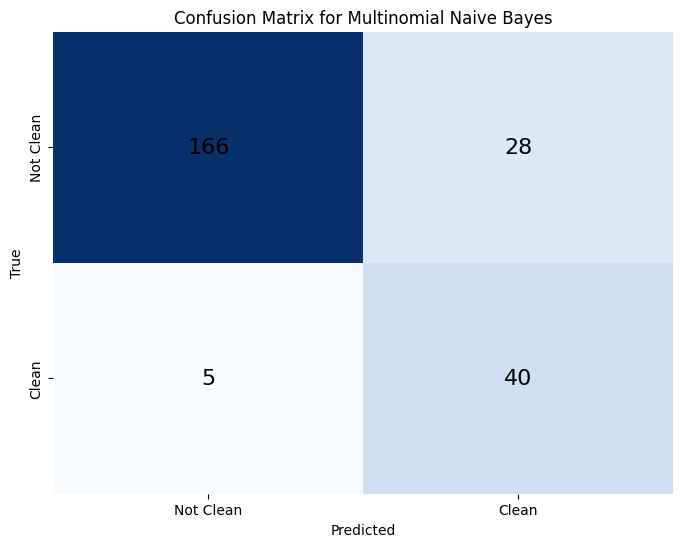

In [41]:
# Preparing the data for modeling

# vectorize
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['ingredient_description'].fillna(''))
y = df['is_clean']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sample data
print("Sample of training data (X_train):")
print(X_train[:5].toarray())
print("Sample of testing data (X_test):")
print(X_test[:5].toarray())



# MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=['Not Clean', 'Clean'], yticklabels=['Not Clean', 'Clean'], cbar=False)
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.5, f'{cm[i, j]}', ha='center', va='center', fontsize=16, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()


Sample of training data (X_train):
     size  loves_count  number_of_reviews  rating  list_price
728  0.27       130385              12369  3.8441        28.0
138  0.11        21359                469  4.6290        35.0
582  0.24        21816                532  4.3271        45.0
667  0.17        19148                250  4.0400        28.0
910  0.01        88216                542  3.2731        26.0

Sample of testing data (X_test):
     size  loves_count  number_of_reviews  rating  list_price
533  0.12       110301               1442  4.3717        24.0
618  0.50         5268                527  4.2751        32.0
671  0.40        11657                157  4.0191        41.0
220  0.20        19553                473  4.2981        32.0
58   1.00        93829                231  4.2987        70.0
Accuracy: 0.7656903765690377
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       194
           1       0.35  

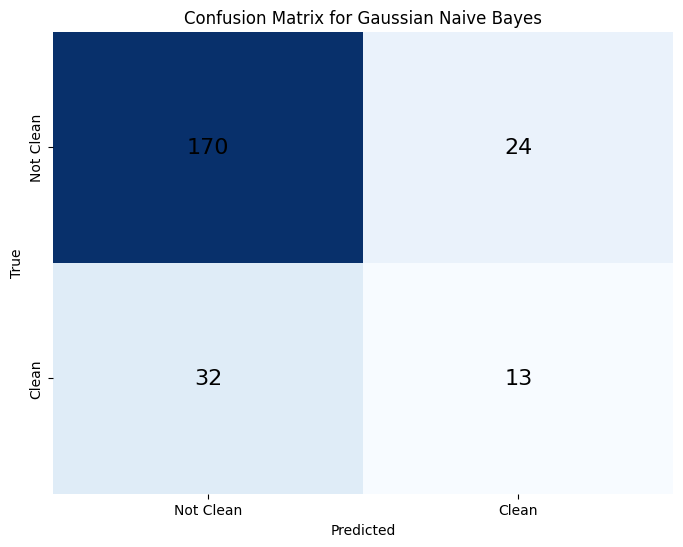

In [42]:
# continuous features for classification
features = ['size', 'loves_count', 'number_of_reviews', 'rating', 'list_price']
X = df[features]
y = df['is_clean']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sample of the training and test data
print("Sample of training data (X_train):")
print(X_train.head())  # Display first 5 rows of X_train

print("\nSample of testing data (X_test):")
print(X_test.head())  # Display first 5 rows of X_test



# train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=['Not Clean', 'Clean'], yticklabels=['Not Clean', 'Clean'], cbar=False)
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.5, f'{cm[i, j]}', ha='center', va='center', fontsize=16, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()


              brand_name secondary_category       tertiary_category
0               Ami Colé                Lip    Lip Balm & Treatment
1               Ami Colé               Face      Tinted Moisturizer
2               Ami Colé                Eye                 Mascara
3               Ami Colé               Face  Setting Spray & Powder
4               Ami Colé               Face             Highlighter
...                  ...                ...                     ...
1189  Yves Saint Laurent                Eye                 Mascara
1190  Yves Saint Laurent                Lip                Lipstick
1191  Yves Saint Laurent              Cheek                   Blush
1192  Yves Saint Laurent               Face             Face Primer
1193  Yves Saint Laurent               Face             Face Primer

[1194 rows x 3 columns]
Sample of training data (X_train):
           brand_name secondary_category tertiary_category
728       MILK MAKEUP                Eye           Mascara
138   

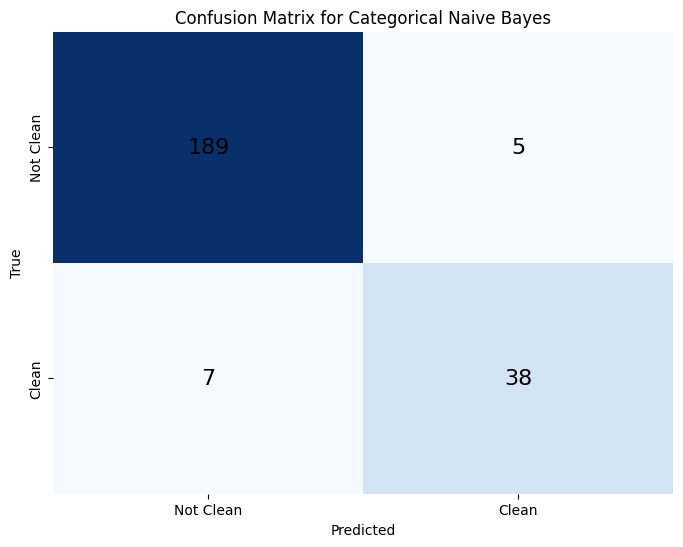

In [43]:
# categorical columns for features
categorical_columns = ['brand_name', 'secondary_category', 'tertiary_category']
print(df[categorical_columns])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X = df[categorical_columns]  # Features
y = df['is_clean']  # Target variable

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sample of the training and test data
print("Sample of training data (X_train):")
print(X_train.head())  # Display first 5 rows of X_train

print("\nSample of testing data (X_test):")
print(X_test.head())  # Display first 5 rows of X_test

# pipeline with the OneHotEncoder and CategoricalNB model
pipeline = Pipeline([
    ('encoder', ColumnTransformer(
        transformers=[('cat', encoder, categorical_columns)]
    )),
    ('model', CategoricalNB())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=['Not Clean', 'Clean'], yticklabels=['Not Clean', 'Clean'], cbar=False)
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.5, f'{cm[i, j]}', ha='center', va='center', fontsize=16, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Categorical Naive Bayes')
plt.show()

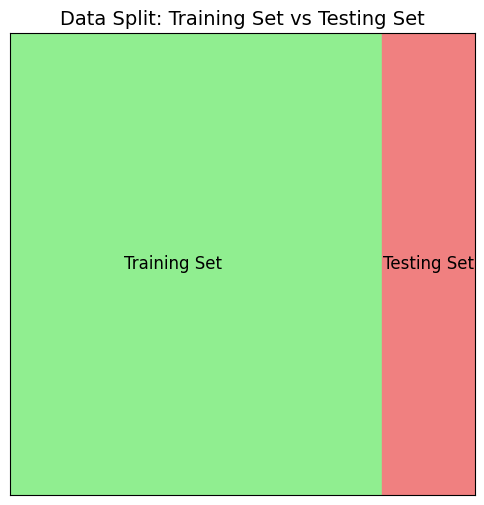

In [44]:
# diagram to represent the data split
fig, ax = plt.subplots(figsize=(6, 6))

ax.add_patch(plt.Rectangle((0, 0), 1, 1, color='lightblue', label="Dataset", alpha=0.5))
ax.add_patch(plt.Rectangle((0, 0), 0.8, 1, color='lightgreen', label="Training Set"))
ax.add_patch(plt.Rectangle((0.8, 0), 0.2, 1, color='lightcoral', label="Testing Set"))

ax.text(0.35, 0.5, 'Training Set', color='black', fontsize=12, ha='center', va='center')
ax.text(0.9, 0.5, 'Testing Set', color='black', fontsize=12, ha='center', va='center')

ax.set_xticks([])
ax.set_yticks([])

plt.title('Data Split: Training Set vs Testing Set', fontsize=14)
plt.show()
